In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# person_1 
base_path = 'data/'

# train
train_basetable = pd.read_csv(base_path + 
                              'csv_files/train/train_base.csv')
train_person_1 = pd.read_csv(base_path + 
                             'csv_files/train/train_person_1.csv')


# test
test_basetable = pd.read_csv(base_path + 
                              'csv_files/test/test_base.csv')
                              
test_person_1 = pd.read_csv(base_path + 
                             'csv_files/test/test_person_1.csv')

#### person_1

- case_id: 계약
- num_group1 = 0: 계약 신청자(클라이언트)
- num_group1 != 0: 보증인, 공동대출자,,,

1. 대출 신청자에 대한 정보(num_group1이 0)

결측치가 50% 가 넘는 columns: ['birthdate_87D', 'childnum_185L', 'empl_employedfrom_271D', 'empl_employedtotal_800L', 'empl_industry_691L', 'familystate_447L', 'gender_992L', 'housetype_905L', 'housingtype_772L', 'isreference_387L', 'maritalst_703L', 'relationshiptoclient_415T', 'relationshiptoclient_642T', 'remitter_829L', 'role_993L']


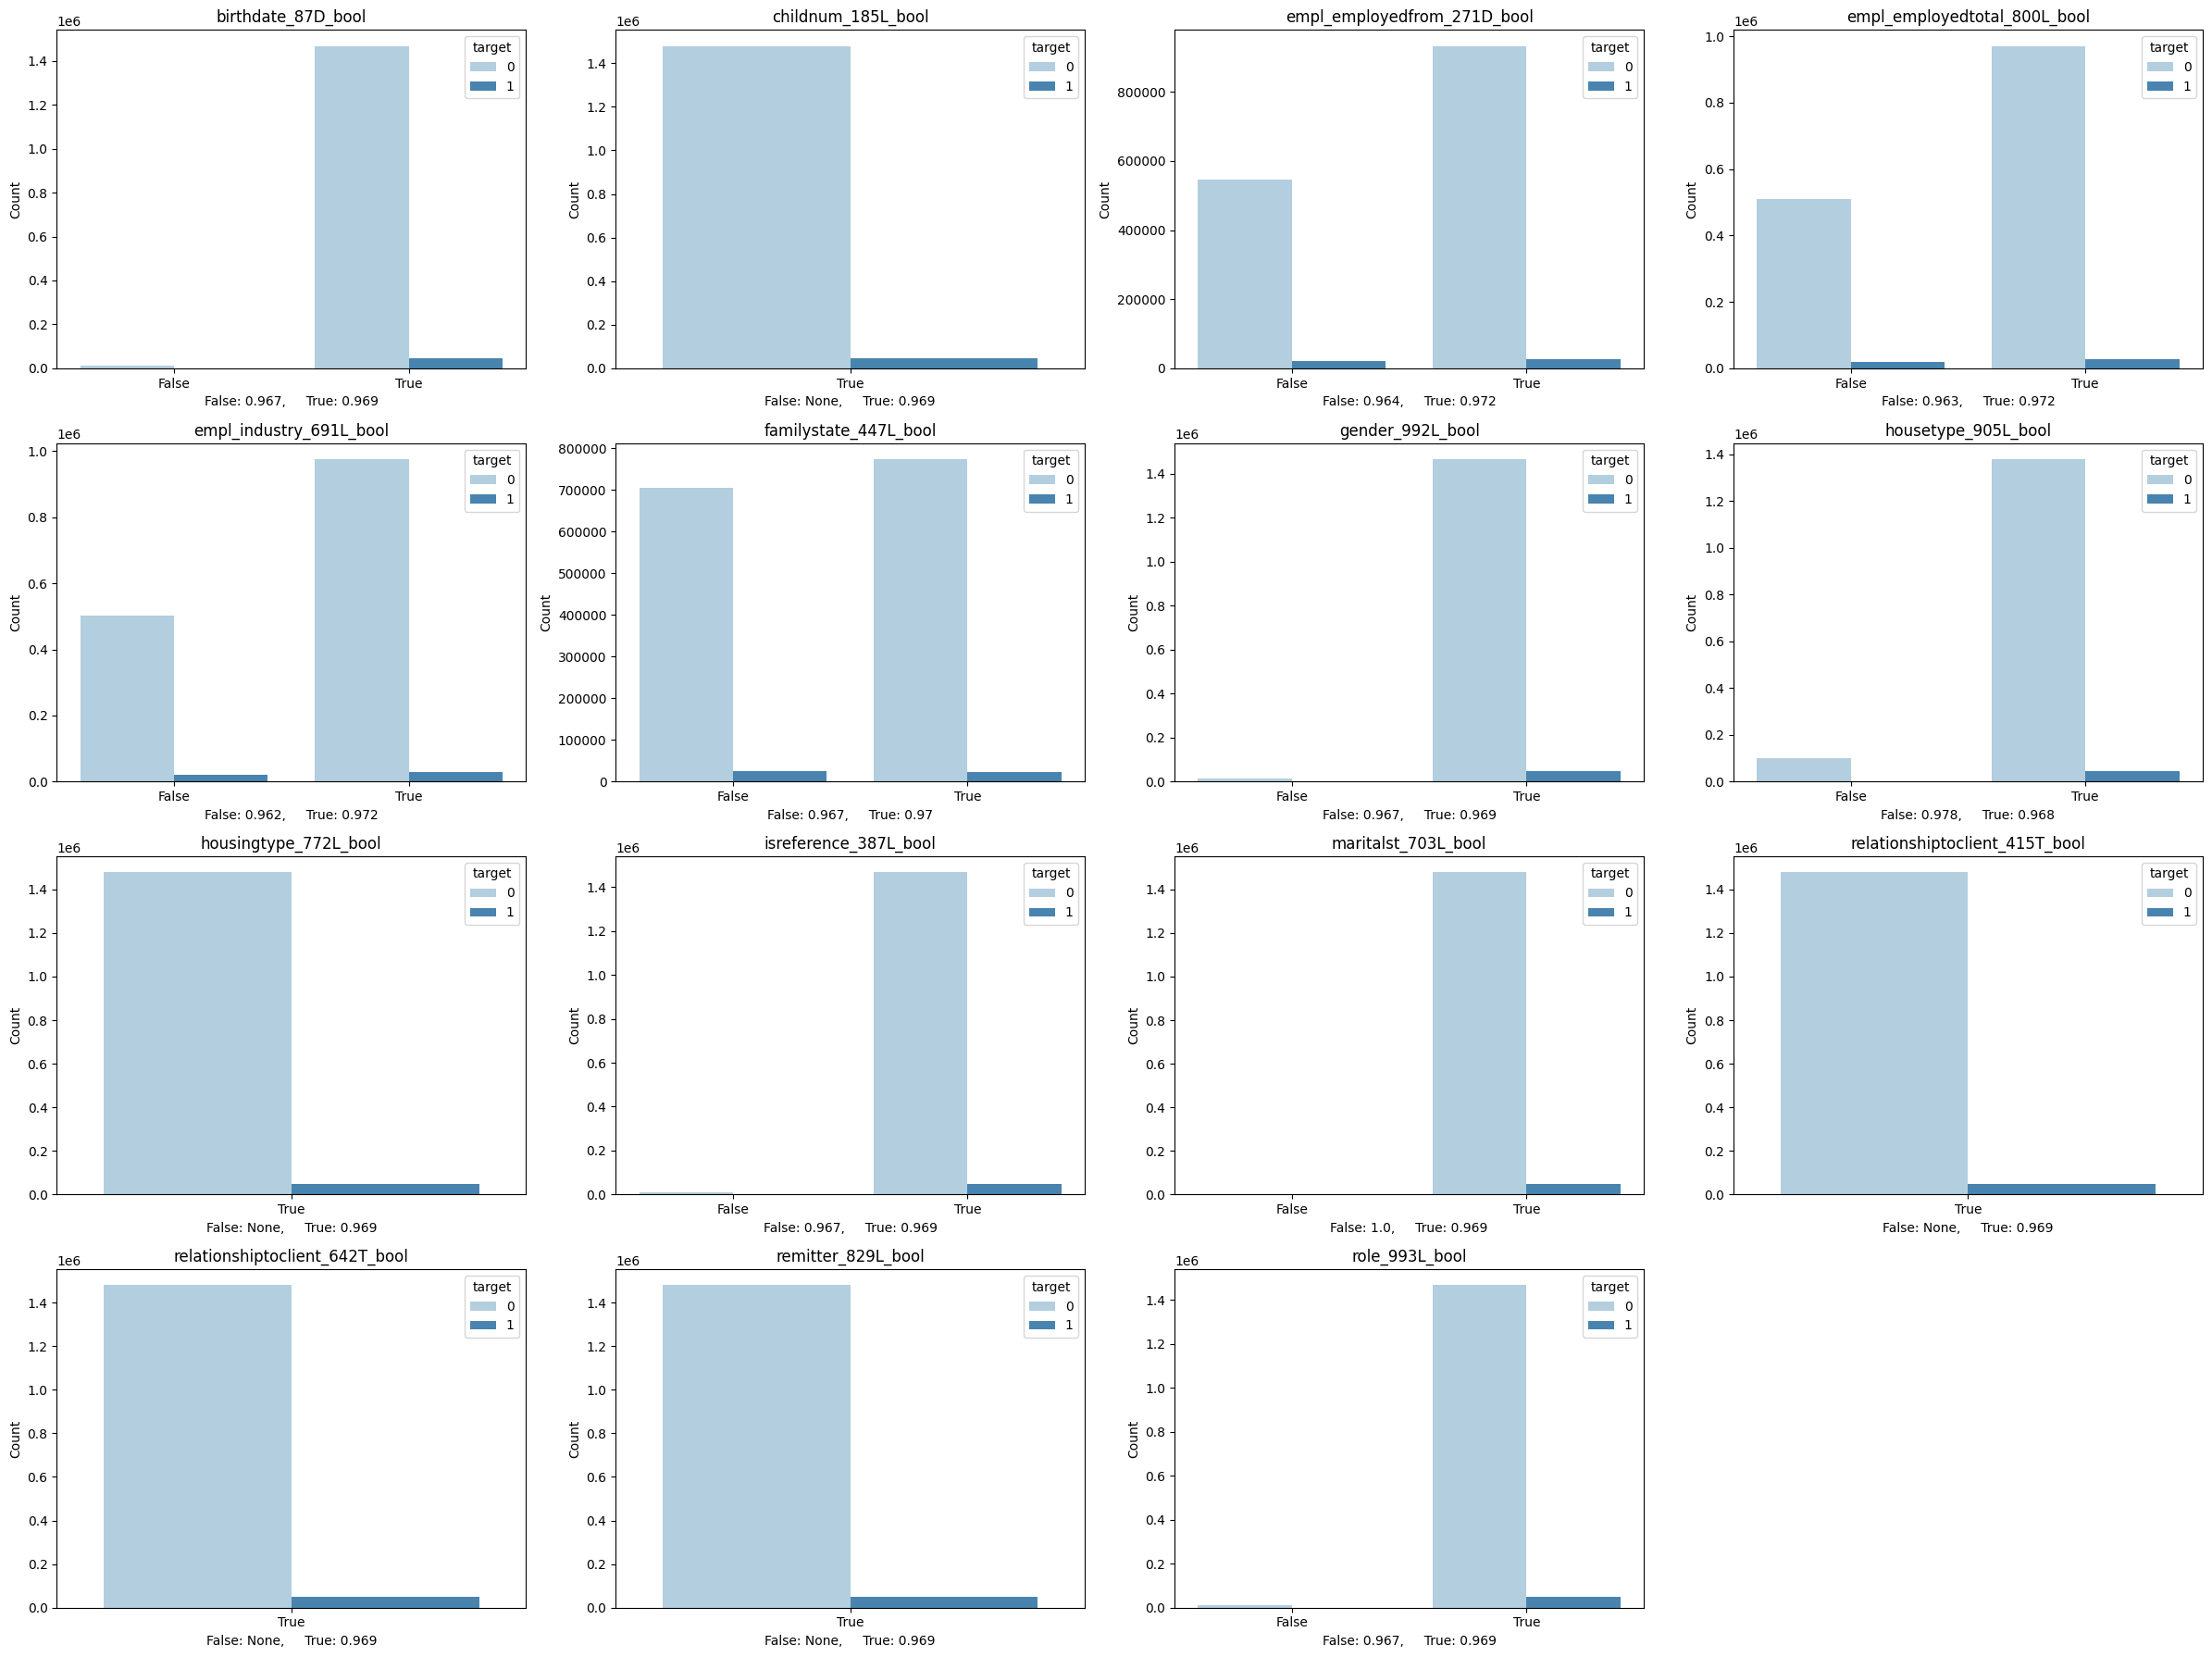

In [ ]:
# num_group이 0가 대출 신청자를 의미한다.
# 대출 신청자의 정보를 기준으로 했을 때의 결측치의 비율이 50%가 넘고,
# 결측치의 여부가 target의 결과에 영향이 없는 경우 해당 column은 제외하였다. (이 column들은 이후 따로 다룰 예정)
def is_meaningful(df:pd.DataFrame, threshold=50, type='train'):
    print_buf = []
    temp_df = pd.DataFrame(df['case_id'])
    # 데이터셋에서 결측치 50% 이상인 column들 추출하기
    for col in df.columns:
        if (df[col].isna().sum() / df[col].shape[0] * 100) > threshold:
            temp_df[col] = df[col]
            print_buf.append(col)
    
    print(f'결측치가 {threshold}% 가 넘는 columns: {print_buf}')

    # type에 따라 해당 타입의 base.csv 파일 불러오기
    base_file = pd.read_csv(f'data/csv_files/{type}/{type}_base.csv')

    # base 파일과 temp_df를 case_id를 기준으로 합치기
    merged_data = pd.merge(base_file, temp_df, on='case_id', how='inner')

    bool_idx = len(merged_data.columns)

    # 결측치에 따른 target value 확인하기
    # 1. 결측값을 True, 나머지 값들을 False로 설정하는 새로운 column 생성
    for col in merged_data.columns[5:]:
        merged_data[f'{col}_bool'] = merged_data[col].isna()

    # 2. 그래프 출력
    plt.figure(figsize=(24, 18))
    for i, col in enumerate(merged_data.columns[bool_idx:]):
        plt.subplot(4, len(merged_data.columns[bool_idx:]) // 4 + 1, i + 1)
        sns.countplot(data=merged_data, x=col, hue='target', palette='Blues')

        if merged_data[merged_data[col] == False].shape[0]:
            false_ratio = round(merged_data[(merged_data[col] == False) & (merged_data['target'] == 0)].shape[0] / merged_data[merged_data[col] == False].shape[0], 3)
        else:
            false_ratio = 'None'

        if merged_data[merged_data[col] == True].shape[0]:
            true_ratio = round(merged_data[(merged_data[col] == True) & (merged_data['target'] == 0)].shape[0] / merged_data[merged_data[col] == True].shape[0], 3)
        else:
            true_ratio = 'None'

        plt.title(col)
        plt.xlabel(f'False: {false_ratio},     True: {true_ratio}')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    return print_buf

not_used = is_meaningful(df=train_person_1[train_person_1['num_group1'] == 0], threshold=50, type='train')

# >> True: 결측치 O, False: 결측치 X
# >> True만 존재: num_group에 대해 모든 정보가 결측치로 이루어져있다.
# 결론: target에 영향을 주지 않는다.

In [ ]:
# 남은 column들 중, 중복되는 정보가 있는지 확인
# [1:] --> case_id 제외
used_columns = []
for col in train_person_1[train_person_1['num_group1'] == 0].columns[1:]:
    if col not in not_used:
        used_columns.append(col)
        print(col)

# https://www.notion.so/ML-Project-Home-Credit-b8ad4939d3fe47e2a5e9ba0b18a23868
# 위 링크에서 'person_1' --> '유사한 column 모음' 참고!

# contaddr_district_15M 과 contaddr_zipcode_807M
# persontype_1072L과 persontype_792L
        
# contaddr_district_15M과 persontype_1072L를 선택하였다.
# 이유: 첫번째 경우 크게 상관이 없을 것 같고, 
# 두번째의 경우 결측치의 비율이 0.2%, 21.6% 이기에 persontype_1072L를 선택하였다.

used_columns.remove('contaddr_zipcode_807M')
used_columns.remove('persontype_792L')

new_train_person_1 = train_person_1[train_person_1['num_group1'] == 0].loc[:, ['case_id'] + used_columns]
new_train_person_1

birth_259D
contaddr_district_15M
contaddr_matchlist_1032L
contaddr_smempladdr_334L
contaddr_zipcode_807M
education_927M
empladdr_district_926M
empladdr_zipcode_114M
incometype_1044T
language1_981M
mainoccupationinc_384A
num_group1
personindex_1023L
persontype_1072L
persontype_792L
registaddr_district_1083M
registaddr_zipcode_184M
role_1084L
safeguarantyflag_411L
sex_738L
type_25L


,case_id,birth_259D,contaddr_district_15M,contaddr_matchlist_1032L,contaddr_smempladdr_334L,education_927M,empladdr_district_926M,empladdr_zipcode_114M,incometype_1044T,language1_981M,mainoccupationinc_384A,num_group1,personindex_1023L,persontype_1072L,registaddr_district_1083M,registaddr_zipcode_184M,role_1084L,safeguarantyflag_411L,sex_738L,type_25L
0,0,1986-07-01,P88_18_84,False,False,P97_36_170,P142_57_166,P167_100_165,SALARIED_GOVT,P10_39_147,10800.0,0,0.0,1.0,P88_18_84,P167_100_165,CL,True,F,PRIMARY_MOBILE
4,1,1957-08-01,P103_93_94,False,False,P97_36_170,P49_46_174,P160_59_140,SALARIED_GOVT,P10_39_147,10000.0,0,0.0,1.0,P103_93_94,P176_37_166,CL,True,M,PRIMARY_MOBILE
9,2,1974-12-01,P91_125_184,False,False,P97_36_170,P63_14_24,P161_5_97,EMPLOYED,P10_39_147,14000.0,0,0.0,1.0,P91_125_184,P161_5_97,EM,True,F,PRIMARY_MOBILE
14,3,1993-08-01,P155_139_77,False,False,P33_146_175,P131_33_167,P161_14_174,EMPLOYED,P10_39_147,10000.0,0,0.0,1.0,P155_139_77,P161_14_174,CL,True,F,PRIMARY_MOBILE
17,4,1994-01-01,P194_82_174,False,False,P33_146_175,P62_144_102,P8_88_79,EMPLOYED,P10_39_147,24000.0,0,0.0,1.0,P194_82_174,P8_88_79,CL,True,F,PRIMARY_MOBILE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973984,2703450,1960-01-01,P123_39_170,False,False,a55475b1,a55475b1,a55475b1,RETIRED_PENSIONER,P209_127_106,40000.0,0,0.0,1.0,P123_39_170,P40_33_175,CL,True,F,PRIMARY_MOBILE
2973985,2703451,1950-11-01,P162_18_172,False,False,a55475b1,a55475b1,a55475b1,RETIRED_PENSIONER,P209_127_106,36800.0,0,0.0,1.0,P162_18_172,P80_161_153,CL,True,F,PRIMARY_MOBILE
2973987,2703452,1977-08-01,P133_44_167,False,False,a55475b1,a55475b1,a55475b1,PRIVATE_SECTOR_EMPLOYEE,P209_127_106,30000.0,0,0.0,1.0,P19_11_176,P11_15_81,CL,False,M,PRIMARY_MOBILE
2973988,2703453,1950-02-01,P123_6_84,False,False,a55475b1,a55475b1,a55475b1,RETIRED_PENSIONER,P209_127_106,30000.0,0,0.0,1.0,P123_6_84,P46_103_143,CL,False,F,PRIMARY_MOBILE


In [ ]:
# 3. 결측치 처리
# 0.03% 비율의 영향이 굉장히 작을 것으로 예상된다.
# 따라서 데이터 타입이 object인 경우 최빈값으로, float64인 경우 평균값, int64인 경우 중앙값으로 채워넣을 것이다.
print('=' * 45)
for col in new_train_person_1.columns[1:]:
    print(f'{col:26}의 결측치 비율: {new_train_person_1[col].isna().sum() / new_train_person_1[col].shape[0] * 100:.2f}%')
print('=' * 45)

for col in new_train_person_1.columns[1:]:
    if new_train_person_1[col].dtype == 'object':
        new_train_person_1[col].fillna(new_train_person_1[col].mode()[0], inplace=True)
    elif new_train_person_1[col].dtype == 'float64':
        new_train_person_1[col].fillna(new_train_person_1[col].mean(), inplace=True)
    else:
        new_train_person_1[col].fillna(new_train_person_1[col].median(), inplace=True)

birth_259D                의 결측치 비율: 0.00%
contaddr_district_15M     의 결측치 비율: 0.00%
contaddr_matchlist_1032L  의 결측치 비율: 0.03%
contaddr_smempladdr_334L  의 결측치 비율: 0.03%
education_927M            의 결측치 비율: 0.00%
empladdr_district_926M    의 결측치 비율: 0.00%
empladdr_zipcode_114M     의 결측치 비율: 0.00%
incometype_1044T          의 결측치 비율: 0.00%
language1_981M            의 결측치 비율: 0.00%
mainoccupationinc_384A    의 결측치 비율: 0.00%
num_group1                의 결측치 비율: 0.00%
personindex_1023L         의 결측치 비율: 0.00%
persontype_1072L          의 결측치 비율: 0.00%
registaddr_district_1083M 의 결측치 비율: 0.00%
registaddr_zipcode_184M   의 결측치 비율: 0.00%
role_1084L                의 결측치 비율: 0.00%
safeguarantyflag_411L     의 결측치 비율: 0.00%
sex_738L                  의 결측치 비율: 0.00%
type_25L                  의 결측치 비율: 0.00%


2. num_group1이 0이 아닌 경우

In [ ]:
print('=' * 47)
for col in train_person_1.columns:
    # 대출 신청자 정보에 포함되지 않는 정보들 중
    if col not in new_train_person_1.columns:
        # 해당 정보의 결측치 출력
        temp = train_person_1[train_person_1['num_group1'] != 0][col]
        print(f'{col:26}의 결측치 비율: {temp.isna().sum() / temp.shape[0] * 100:.2f}%')
print('=' * 47)

birthdate_87D             의 결측치 비율: 99.14%
childnum_185L             의 결측치 비율: 99.32%
contaddr_zipcode_807M     의 결측치 비율: 0.00%
empl_employedfrom_271D    의 결측치 비율: 100.00%
empl_employedtotal_800L   의 결측치 비율: 100.00%
empl_industry_691L        의 결측치 비율: 100.00%
familystate_447L          의 결측치 비율: 100.00%
gender_992L               의 결측치 비율: 99.14%
housetype_905L            의 결측치 비율: 100.00%
housingtype_772L          의 결측치 비율: 99.32%
isreference_387L          의 결측치 비율: 99.14%
maritalst_703L            의 결측치 비율: 99.22%
persontype_792L           의 결측치 비율: 44.38%
relationshiptoclient_415T 의 결측치 비율: 44.38%
relationshiptoclient_642T 의 결측치 비율: 44.32%
remitter_829L             의 결측치 비율: 44.38%
role_993L                 의 결측치 비율: 99.14%


In [ ]:
# contaddr_zipcode_807M (object): 우편번호 ---> 최빈값(mode)
# persontype_792L (int64): 유형(개인, 공동신청자 등) ---> 평균값을 반올림
# relationshiptoclient_415T (object): 클라이언트와의 관계 ---> 최빈값(mode) | 642T와 99.9% 동일한 정보이기에 택일
# remitter_829L (bool): 클라이언트가 송금인인지 여부 ---> 최댓값(max)

def mean_rounded(x):
    return round(x.mean())

def mode_series(x):
    modes = x.mode()
    if len(modes):
        return modes.iloc[0]
    else:
        return None

def is_false(x):
    if any(val is False for val in x):
        return False
    else:
        return None

used_columns_guarantee = ['contaddr_zipcode_807M', 'persontype_792L', 'relationshiptoclient_415T', 'remitter_829L']

temp = train_person_1.loc[:, ['case_id'] + used_columns_guarantee]
result = temp.groupby('case_id').aggregate({
    'contaddr_zipcode_807M': mode_series,
    'persontype_792L': mean_rounded,
    'relationshiptoclient_415T': mode_series,
    'remitter_829L': is_false
})
result


,contaddr_zipcode_807M,persontype_792L,relationshiptoclient_415T,remitter_829L
case_id,,,,
0,a55475b1,3,COLLEAGUE,False
1,a55475b1,4,OTHER_RELATIVE,False
2,a55475b1,3,SIBLING,False
3,a55475b1,2,SPOUSE,False
4,a55475b1,4,COLLEAGUE,False
...,...,...,...,...
2703450,P40_33_175,1,None,None
2703451,P80_161_153,1,None,None
2703452,P59_150_74,1,None,None


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526659 entries, 0 to 2703454
Data columns (total 4 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   contaddr_zipcode_807M      1526659 non-null  object
 1   persontype_792L            1526659 non-null  int64 
 2   relationshiptoclient_415T  591033 non-null   object
 3   remitter_829L              591033 non-null   object
dtypes: int64(1), object(3)
memory usage: 58.2+ MB


In [ ]:
# new_train_person_1 : 대출 신청자 정보
# result : 주변인 정보
person_final_features = pd.merge(new_train_person_1, result, how='left', on='case_id')
person_final_features.drop('num_group1', axis=1, inplace=True)
person_final_features.head()

person_final_features.to_csv('aggregated_person_1.csv')